In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv('/content/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [193]:
df.shape

(200, 2)

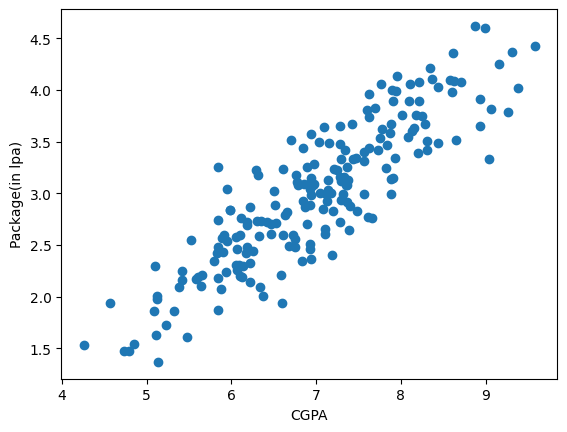

In [194]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [195]:
# From above Scatter plot, Data is sort of Linear

In [196]:
# X - input columns
# y - output columns

In [197]:
X = df.iloc[:,0:1]
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [198]:
y = df.iloc[:,1:2]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [199]:
# dividing data into two set :-

# training set - through which I will train my model
# testing set - through which I will test my model

In [200]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [202]:
X_train.shape

(160, 1)

In [203]:
# test_size = 0.2 --> 20% data goes to test

In [204]:
# apply our algorithm

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [205]:
# fit is used to train the model --- means finding best-fit-line equation by finding slope(m) & intercept(b)
lr.fit(X_train,y_train)

LinearRegression()

In [206]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [207]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [208]:
# give X_test(cgpa) to model so that it can predict y_test(lpa)

lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.89111601]])

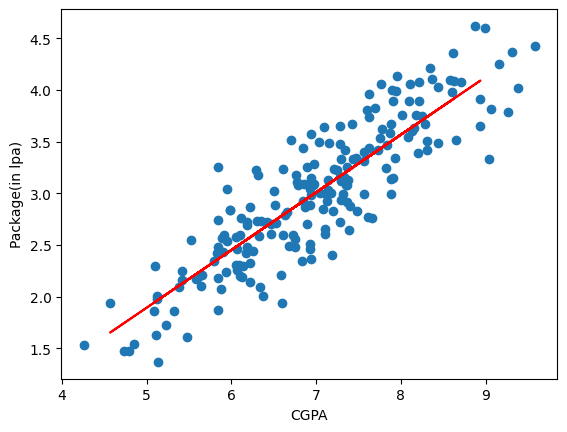

In [209]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_test, lr.predict(X_test), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [210]:
# slope value of line

m = lr.coef_
m

array([[0.55795197]])

In [211]:
# intercept value of line

b = lr.intercept_
b

array([-0.89611192])

In [212]:
# equation of line

# y = mx + c

In [213]:
m*8.58 + b

array([[3.89111601]])

## Using value of m & b make a python class which is similar to sklearn Linear Regression class

In [226]:
class MyLG:

  def __init__(self):
    self.m = None
    self.b = None



  def fit(self, X_train, y_train):

    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
      den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())

    print(self.m)
    print(self.b)



  def predict(self, X_test):
    return (self.m * X_test) + self.b 

In [215]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [216]:
df.shape

(200, 2)

In [217]:
X = df.iloc[:,0].values
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [218]:
y = df.iloc[:,1].values
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [220]:
X_train

array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
       7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
       5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
       7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
       6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
       7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
       6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
       6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
       5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
       7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
       7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
       8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
       6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
       6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.

In [221]:
y_train

array([3.13, 3.91, 2.25, 2.3 , 4.06, 3.18, 2.7 , 2.49, 3.15, 2.99, 4.08,
       4.14, 2.6 , 2.44, 2.71, 2.72, 1.63, 2.31, 2.51, 3.5 , 2.24, 2.58,
       2.42, 2.54, 4.37, 2.17, 3.14, 2.19, 3.54, 1.54, 2.72, 3.98, 2.46,
       3.  , 1.98, 2.65, 3.75, 3.67, 2.93, 3.08, 2.21, 2.84, 3.76, 3.03,
       2.09, 3.26, 2.16, 2.7 , 3.83, 2.88, 3.16, 3.04, 3.13, 3.04, 4.6 ,
       3.26, 2.85, 2.09, 3.31, 3.89, 1.87, 3.11, 2.4 , 3.48, 3.08, 2.76,
       2.93, 3.39, 2.35, 3.08, 2.14, 3.24, 1.73, 3.24, 3.44, 2.69, 3.33,
       2.42, 2.57, 3.55, 2.66, 1.53, 2.98, 2.84, 3.52, 3.16, 3.82, 2.6 ,
       1.61, 2.2 , 2.99, 3.12, 2.74, 2.83, 2.77, 2.35, 2.19, 3.42, 4.02,
       3.89, 3.15, 3.99, 3.42, 3.08, 2.46, 2.61, 3.49, 3.76, 2.82, 4.03,
       2.99, 2.73, 2.18, 3.09, 3.96, 2.1 , 3.33, 4.62, 3.47, 2.48, 4.43,
       4.11, 3.44, 3.18, 3.02, 4.06, 2.26, 1.48, 2.94, 2.89, 2.72, 3.09,
       2.73, 4.36, 3.  , 3.79, 2.59, 2.87, 3.57, 1.37, 3.6 , 2.43, 3.33,
       2.31, 3.4 , 3.89, 4.25, 3.26, 3.67, 2.79, 3.

In [227]:
Lr = MyLG()

In [228]:
Lr.fit(X_train, y_train)

0.5579519734250721
-0.8961119222429152


In [230]:
Lr.predict(X_test[0])

3.891116009744203